In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)

In [4]:
df.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
# The names of the columns are not given. Let's load the df again with column names
df = pd.read_csv(url, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "target"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Let us split the target column from our data
X = df.drop("target", axis=1)
y= df["target"]

In [7]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [8]:
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: target, dtype: object

In [9]:
# Pipelines take the input in the form of tuples. Because the packing and unpacking is done by the pipeline itself
pca_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [10]:
X_pca = pca_pipeline.fit_transform(X)

In [11]:
pca_df = pd.DataFrame(data=X_pca, columns=["pc1", "pc2"])

In [12]:
pca_df.head()

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [13]:
pca_df = pd.concat([pca_df, y], axis=1)

In [14]:
pca_df

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [15]:
pca_df["target"].value_counts()

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [16]:
targets = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ['r','b','g']

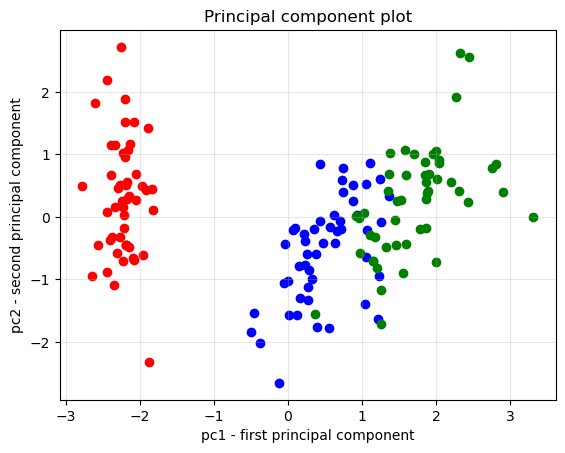

In [17]:
for target, color in zip(targets, colors):
    indices = pca_df["target"] == target
    plt.scatter(pca_df.loc[indices,"pc1"], pca_df.loc[indices,"pc2"], c=color)
    plt.title("Principal component plot")
    plt.xlabel("pc1 - first principal component")
    plt.ylabel("pc2 - second principal component")
    plt.grid(alpha=0.3)

In [18]:
# Explained variance ratio:
print("explained variance ratio: ", pca_pipeline.named_steps["pca"].explained_variance_ratio_)

explained variance ratio:  [0.72770452 0.23030523]


In [19]:
arr = [0.72770452, 0.23030523]
sum(arr)

0.95800975

In [20]:
# In the explained variance ratio: [0.72770452, 0.23030523]
# 0.72770452 is the explained variance ratio of "pc1"
# It means ~72% of variability of the original data (before pca) is explained by pc1
# 0.23030523 is the explained variance ratio of "pc2"
# It means ~23% of the variability of the original data (before pca) is explaineed by pc2
# The sum of explained variance ratio of pc1 and pc2 is ~95%
# Hence, ~5% of the information from the original data is lost and ~95% is retained 

In [21]:
# Now, we will apply the logistic regression and random forest models on our data
# Prior to that, let us split the data into train and test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Logistic regression with the help of pipeline
lr_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('lr', LogisticRegression(max_iter=1000, C=1.0))
])

lr_cross = cross_val_score(lr_pipeline, X_train, y_train, cv=5)
print(f"cross validation score: {lr_cross}")
print(f"cross validation score mean: {np.mean(lr_cross)}")

lr_pipeline.fit(X_train,y_train)
lr_predict = lr_pipeline.predict(X_test)
print("Logistic Regression Classification report")
print(classification_report(y_test, lr_predict))

cross validation score: [1.         0.9047619  0.80952381 1.         0.80952381]
cross validation score mean: 0.9047619047619048
Logistic Regression Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.91      0.77      0.83        13
 Iris-virginica       0.80      0.92      0.86        13

       accuracy                           0.91        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.92      0.91      0.91        45



In [24]:
# In the pipeline for pca, we used X_pca = pca_pipeline.fit_transform(X) but for Logistic regression we used lr_pipeline.fit(X_train, y_train)
# The pipeline will implicitly standardize the data since it is mentioned in the pipeline
# However, it will not return the output of X in the standardized format if we use only pca_pipelin.fit(X)
# Because, we need the X in the standard scaler we have to use fit_transform so it can transform X
# Hence, we use fit_transform in pca while only fit in logistic regression

In [25]:
# Random forest with the help of pipeline
rf_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('rf', RandomForestClassifier(n_estimators=105, random_state=42))
])

rf_cross = cross_val_score(rf_pipeline, X_train, y_train, cv=5)
print(f"cross validation score: {rf_cross}")
print(f"cross validation score mean: {np.mean(rf_cross)}")

rf_pipeline.fit(X_train,y_train)
rf_predict = rf_pipeline.predict(X_test)
print("Random Forest Classification report")
print(classification_report(y_test, rf_predict))

cross validation score: [0.95238095 0.9047619  0.80952381 0.95238095 0.80952381]
cross validation score mean: 0.8857142857142858
Random Forest Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



**Random forest performs better than Logistic Regression with 96% accuracy score and has got good balance among all classes**